In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
titanic_data = sns.load_dataset('titanic')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
selected_labels= ['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# values_dict = {'age': 29.69911764705882}
titanic_data['age']= titanic_data['age'].fillna(29.69911764705882)
titanic_data.dropna(subset=['embarked', 'embark_town'], axis=0, inplace=True)
print(titanic_data)
print(titanic_data.isna().sum())

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man     

In [7]:
y = titanic_data['survived']
x = titanic_data[selected_labels]
print(x)
print(y)

     pclass     sex        age  sibsp  parch embarked   class    who  \
0         3    male  22.000000      1      0        S   Third    man   
1         1  female  38.000000      1      0        C   First  woman   
2         3  female  26.000000      0      0        S   Third  woman   
3         1  female  35.000000      1      0        S   First  woman   
4         3    male  35.000000      0      0        S   Third    man   
..      ...     ...        ...    ...    ...      ...     ...    ...   
886       2    male  27.000000      0      0        S  Second    man   
887       1  female  19.000000      0      0        S   First  woman   
888       3  female  29.699118      1      2        S   Third  woman   
889       1    male  26.000000      0      0        C   First    man   
890       3    male  32.000000      0      0        Q   Third    man   

     adult_male  embark_town alive  alone  
0          True  Southampton    no  False  
1         False    Cherbourg   yes  False  
2  

In [8]:
x['family_size'] = titanic_data.loc[:,['sibsp', 'parch']].sum(axis=1)
print(x)

     pclass     sex        age  sibsp  parch embarked   class    who  \
0         3    male  22.000000      1      0        S   Third    man   
1         1  female  38.000000      1      0        C   First  woman   
2         3  female  26.000000      0      0        S   Third  woman   
3         1  female  35.000000      1      0        S   First  woman   
4         3    male  35.000000      0      0        S   Third    man   
..      ...     ...        ...    ...    ...      ...     ...    ...   
886       2    male  27.000000      0      0        S  Second    man   
887       1  female  19.000000      0      0        S   First  woman   
888       3  female  29.699118      1      2        S   Third  woman   
889       1    male  26.000000      0      0        C   First    man   
890       3    male  32.000000      0      0        Q   Third    man   

     adult_male  embark_town alive  alone  family_size  
0          True  Southampton    no  False            1  
1         False    Ch

<ipython-input-8-1ab13684e5b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['family_size'] = titanic_data.loc[:,['sibsp', 'parch']].sum(axis=1)


In [9]:
for label in ['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'family_size']:
  print(x[label].unique())

[3 1 2]
['male' 'female']
[22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         0.42       34.5        74.        ]

In [10]:
one_hot_data = pd.get_dummies(x, columns=['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'family_size'])
x= one_hot_data
# print(one_hot_data)
print(x)

           age  pclass_1  pclass_2  pclass_3  sex_female  sex_male  sibsp_0  \
0    22.000000         0         0         1           0         1        0   
1    38.000000         1         0         0           1         0        0   
2    26.000000         0         0         1           1         0        1   
3    35.000000         1         0         0           1         0        0   
4    35.000000         0         0         1           0         1        1   
..         ...       ...       ...       ...         ...       ...      ...   
886  27.000000         0         1         0           0         1        1   
887  19.000000         1         0         0           1         0        1   
888  29.699118         0         0         1           1         0        0   
889  26.000000         1         0         0           0         1        1   
890  32.000000         0         0         1           0         1        1   

     sibsp_1  sibsp_2  sibsp_3  ...  alone_True  fa

In [11]:
scaler = MinMaxScaler()
min_max_age = scaler.fit_transform(np.reshape(np.asarray(x['age']), (-1, 1)))
# print(min_max_age)

In [12]:
x['age']= min_max_age
print(x)

          age  pclass_1  pclass_2  pclass_3  sex_female  sex_male  sibsp_0  \
0    0.271174         0         0         1           0         1        0   
1    0.472229         1         0         0           1         0        0   
2    0.321438         0         0         1           1         0        1   
3    0.434531         1         0         0           1         0        0   
4    0.434531         0         0         1           0         1        1   
..        ...       ...       ...       ...         ...       ...      ...   
886  0.334004         0         1         0           0         1        1   
887  0.233476         1         0         0           1         0        1   
888  0.367921         0         0         1           1         0        0   
889  0.321438         1         0         0           0         1        1   
890  0.396833         0         0         1           0         1        1   

     sibsp_1  sibsp_2  sibsp_3  ...  alone_True  family_size_0 

In [48]:
model = Sequential()

model.add(Input(shape=(47,)))
model.add(Dense(188, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])


In [44]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.1, random_state=42)
print(x_test.shape)

(800, 47)


In [49]:
callback = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=80, epochs=400, callbacks=[callback], validation_data=(x_test, y_test), shuffle=True)

Epoch 1/400
2/2 [==============================] - 1s 195ms/step - loss: 0.6905 - accuracy: 0.5393 - val_loss: 0.6333 - val_accuracy: 0.7513
Epoch 2/400
2/2 [==============================] - 0s 50ms/step - loss: 0.5920 - accuracy: 0.7640 - val_loss: 0.5979 - val_accuracy: 0.7287
Epoch 3/400
2/2 [==============================] - 0s 51ms/step - loss: 0.5686 - accuracy: 0.7753 - val_loss: 0.5686 - val_accuracy: 0.7350
Epoch 4/400
2/2 [==============================] - 0s 49ms/step - loss: 0.5254 - accuracy: 0.7865 - val_loss: 0.5432 - val_accuracy: 0.7487
Epoch 5/400
2/2 [==============================] - 0s 46ms/step - loss: 0.5167 - accuracy: 0.7640 - val_loss: 0.5206 - val_accuracy: 0.7638
Epoch 6/400
2/2 [==============================] - 0s 45ms/step - loss: 0.4665 - accuracy: 0.8427 - val_loss: 0.5014 - val_accuracy: 0.7763
Epoch 7/400
2/2 [==============================] - 0s 50ms/step - loss: 0.4565 - accuracy: 0.7978 - val_loss: 0.4855 - val_accuracy: 0.7800
Epoch 8/400
2/2 [==

In [50]:
model.evaluate(x_test, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000


[0.007267640437930822, 1.0]

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<ipython-input-56-cc925a352049>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
<ipython-input-56-cc925a352049>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')


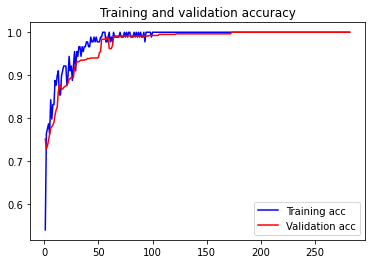

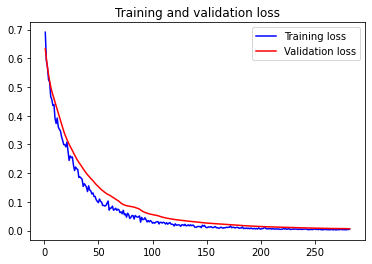

In [56]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and validation loss')
plt.legend()

plt.show()